<a href="https://colab.research.google.com/github/MUNTADHERHAZIM/weeb-----------------------/blob/main/Object_detection_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Увеличение урожайности путем борьбы с сорняками

Сорняки являются нежелательными вторжениями в сельскохозяйственном бизнесе. Нам необходимо обнаружить сорняки и культуры с использованием модели YOLOV8.

Здесь мы можем загрузить набор данных, используя функцию wget, и распаковать загруженный файл, используя функцию unzip:

In [1]:
# Загрузка набора данных Выполняется загрузка архива с набором данных "Weed Detection" с помощью команды wget.
!wget "https://s3-ap-southeast-1.amazonaws.com/he-public-data/Weed_Detection5a431d7.zip"

--2024-04-17 19:22:20--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/Weed_Detection5a431d7.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.128.122, 52.219.184.8, 52.219.40.194, ...
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.128.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83058744 (79M) [binary/octet-stream]
Saving to: ‘Weed_Detection5a431d7.zip’

Weed_Detection5a431 100%[===================>]  79.21M  15.0MB/s    in 6.7s    

2024-04-17 19:22:28 (11.9 MB/s) - ‘Weed_Detection5a431d7.zip’ saved [83058744/83058744]



# Распаковка архива
Выполняется распаковка загруженного архива "Weed_Detection5a431d7.zip" с помощью команды !unzip.

In [2]:
!unzip '/content/Weed_Detection5a431d7.zip'

Archive:  /content/Weed_Detection5a431d7.zip
   creating: data/
  inflating: data/agri_0_1020.jpeg   
  inflating: data/agri_0_1020.txt    
  inflating: data/agri_0_1026.jpeg   
  inflating: data/agri_0_1028.jpeg   
  inflating: data/agri_0_1041.txt    
  inflating: data/agri_0_106.jpeg    
  inflating: data/agri_0_106.txt     
  inflating: data/agri_0_1068.jpeg   
  inflating: data/agri_0_1068.txt    
  inflating: data/agri_0_1079.jpeg   
  inflating: data/agri_0_1082.txt    
  inflating: data/agri_0_1083.jpeg   
  inflating: data/agri_0_1083.txt    
  inflating: data/agri_0_1094.jpeg   
  inflating: data/agri_0_1095.jpeg   
  inflating: data/agri_0_1123.jpeg   
  inflating: data/agri_0_1129.txt    
  inflating: data/agri_0_113.jpeg    
  inflating: data/agri_0_1130.txt    
  inflating: data/agri_0_114.txt     
  inflating: data/agri_0_1140.txt    
  inflating: data/agri_0_1146.jpeg   
  inflating: data/agri_0_1146.txt    
  inflating: data/agri_0_1166.jpeg   
  inflating: data/agri_0

# Установка библиотеки Ultralytics
Данная команда используется для установки библиотеки Ultralytics. Библиотека Ultralytics предоставляет инструменты для обучения и использования моделей глубокого обучения, в том числе YOLO (You Only Look Once).

Установка производится с помощью команды %pip install ultralytics, где %pip - это магическая команда в Jupyter Notebook, которая позволяет установить пакеты Python прямо в текущем сеансе блокнота. Ultralytics - это название устанавливаемой библиотеки.

После выполнения этой команды в блокноте будет доступна библиотека Ultralytics для использования в дальнейших ячейках блокнота.

https://docs.ultralytics.com/

In [3]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

# Установка библиотеки split-folders
Эта команда используется для установки библиотеки split-folders. Библиотека split-folders предоставляет инструменты для разделения датасетов на обучающий, валидационный и тестовый наборы.

Установка производится с помощью магической команды *%pip install split-folders* в Jupyter Notebook. После установки библиотеки split-folders можно использовать ее функции для разделения датасетов на указанные наборы.

In [4]:
%pip install split-folders

1. Импортирует необходимые библиотеки для работы с файлами и изображениями.
2. Использует функцию `glob.glob()` для поиска всех файлов с расширением .jpeg в указанном пути.
3. Проверяет, есть ли как минимум 5 изображений в найденных файлах.
4. Если найдено как минимум 5 изображений, создает фигуру для размещения подграфиков с помощью `plt.figure()`.
5. Проходит по первым пяти изображениям и отображает их в виде подграфиков с помощью `plt.imshow()`.
6. Отображает результаты, если количество изображений достаточно, и выводит сообщение об ошибке в противном случае.

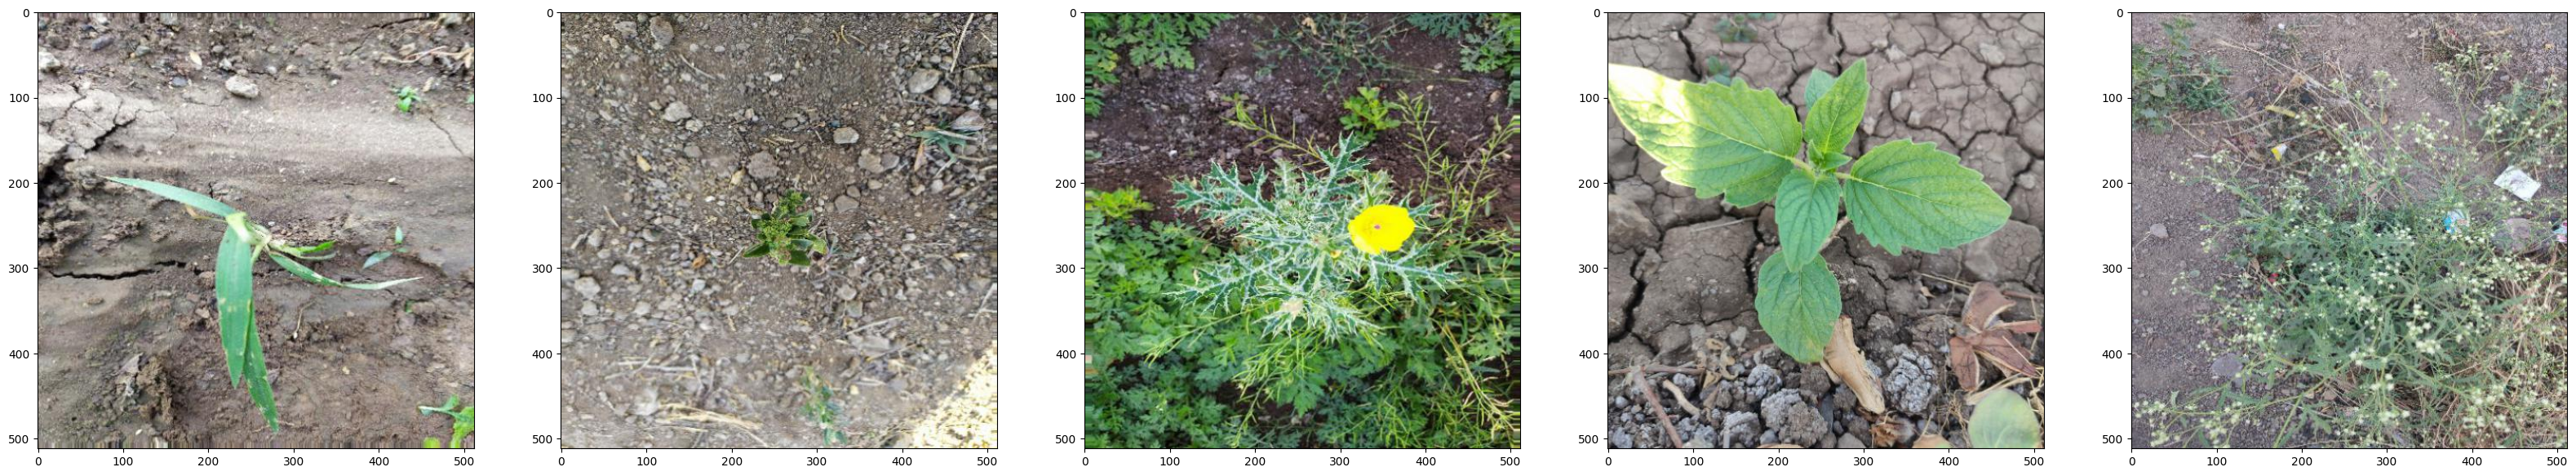

In [5]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Импорт библиотек для работы с файлами и изображениями

# Найти все файлы .jpeg в указанном пути
jpeg_files = glob.glob('/content/data/*.jpeg')

# Проверить, есть ли как минимум 5 изображений
if len(jpeg_files) >= 5:
    # Создать фигуру для размещения подграфиков
    fig = plt.figure(figsize=(40,20))  # Регулируем высоту и ширину фигуры по необходимости

    # Пройти по первым десяти изображениям в полученном списке
    for i in range(5):
        img = plt.imread(jpeg_files[i])
        # Добавить подграфик (расположенный в 1 строке и 5 столбцах)
        ax = fig.add_subplot(1, 5, i+1)
        ax.imshow(img)
    plt.show()

else:
    print("В указанном пути меньше 5 изображений.")


In [ ]:
img2 = plt.imread('/content/data/agri_0_6891.jpeg')
plt.imshow(img2)

#Import necessary libraries

In [7]:
# Импорт необходимых библиотек
import os # - os: для работы с файловой системой
import shutil # - shutil: для выполнения операций копирования и перемещения файлов и папок
import math # - math: для выполнения математических операций
import numpy as np # - numpy as np: для работы с массивами и выполнения вычислений
from ultralytics import YOLO # - from ultralytics import YOLO: импорт класса YOLO из библиотеки ultralytics для работы с моделью обнаружения объектов

#Separate the Image and text file
In the Dataset images and labels in a same folder we must have separate it.

In [8]:
def separate_files(srclocation, deslocation, type_ofImage):
    """
    Функция для разделения файлов из одного расположения в другое по типу изображений.

    Аргументы:
    srclocation (str): Путь к исходному расположению файлов.
    deslocation (str): Путь к целевому расположению файлов.
    type_ofImage (str): Тип изображения для фильтрации.

    Возвращаемое значение:
    None
    """
    # Проверка наличия папки для целевого расположения
    if not os.path.exists("./" + deslocation):
        os.mkdir(deslocation)

    # Получение списка файлов с заданным типом изображения
    files = [t for t in os.listdir(srclocation) if type_ofImage in t.lower()]
    append_path = []
    srclocation = srclocation + '/'

    # Формирование полного пути к файлам
    for txt in files:
        temp = srclocation + (txt)
        append_path.append(temp)

    # Перемещение файлов в целевую папку
    for image in append_path:
        newpath = deslocation + "/"
        shutil.move(image, newpath)


Применение функции separate_files будет осуществлять разделение файлов с расширением .jpeg из папки /content/data в папку images/.

In [9]:
separate_files('/content/data','images/','.jpeg')

Функция separate_files разделит файлы с расширением .txt из папки /content/data и переместит их в папку labels.

In [10]:
separate_files('/content/data','labels/','.txt')

In [14]:
import os
import shutil

# Функция для разделения файлов
def separate_files(directory, subdirectory, extension):
    # Создание подпапки, если она не существует
    os.makedirs(os.path.join(directory, subdirectory), exist_ok=True)

    # Получение списка файлов
    files = [f for f in os.listdir(directory) if f.endswith(extension)]

    # Копирование файлов в подпапку
    for file in files:
        shutil.move(os.path.join(directory, file), os.path.join(directory, subdirectory, file))

# Определение папок
images_dir = '/content/images'  # Путь к папке с изображениями
labels_dir = '/content/labels'  # Путь к папке с метками
output_dir_1 = '/content/output_folder_1'  # Путь к первой выходной папке
output_dir_2 = '/content/output_folder_2'  # Путь ко второй выходной папке

# Создание выходных папок, если они не существуют
os.makedirs(output_dir_1, exist_ok=True)  # Создание первой выходной папки, если не существует
os.makedirs(output_dir_2, exist_ok=True)  # Создание второй выходной папки, если не существует

# Получение списка файлов изображений
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpeg')])  # Сортировка и фильтрация файлов изображений

# Получение списка файлов меток
label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])  # Сортировка и фильтрация файлов меток

# Вычисление общего числа файлов
total_files = len(image_files)  # Общее число файлов изображений
split_point = total_files // 2  # Точка разделения, половина от общего числа файлов

# Разделение файлов
first_half_images = image_files[:split_point]  # Первая половина изображений
first_half_labels = label_files[:split_point]  # Первая половина файлов меток

second_half_images = image_files[split_point:]  # Вторая половина изображений
second_half_labels = label_files[split_point:]  # Вторая половина файлов меток

# Копирование первой половины изображений и соответствующих файлов меток в output_dir_1
for img, lbl in zip(first_half_images, first_half_labels):
    shutil.copy(os.path.join(images_dir, img), os.path.join(output_dir_1, img))  # Копирование изображений
    shutil.copy(os.path.join(labels_dir, lbl), os.path.join(output_dir_1, lbl))  # Копирование файлов меток

# Копирование второй половины изображений и соответствующих файлов меток в output_dir_2
for img, lbl in zip(second_half_images, second_half_labels):
    shutil.copy(os.path.join(images_dir, img), os.path.join(output_dir_2, img))  # Копирование изображений
    shutil.copy(os.path.join(labels_dir, lbl), os.path.join(output_dir_2, lbl))  # Копирование файлов меток

# Разделение файлов в выходных папках
separate_files(output_dir_1, 'images/', '.jpeg')
separate_files(output_dir_1, 'labels/', '.txt')
separate_files(output_dir_2, 'images/', '.jpeg')
separate_files(output_dir_2, 'labels/', '.txt')

print("Файлы успешно разделены и скопированы!")


Файлы успешно разделены и скопированы!


Этот код использует библиотеку splitfolders для разделения содержимого папки `/content/data` на обучающий, валидационный и тестовый наборы данных. Обучающий набор составляет `70%` от исходных данных, валидационный и тестовый - по `15%` и `15%` каждый. Разделение выполняется с учетом указанного семени (seed), без префиксов групп (group_prefix), и без перемещения файлов (move=False).

In [15]:
import splitfolders
splitfolders.ratio('/content/output_folder_1','output_1',seed=1337,ratio=(.7,.15,.15),group_prefix=None,move=False)

Copying files: 1300 files [00:00, 5010.74 files/s]


In [16]:
splitfolders.ratio('/content/output_folder_2','output_2',seed=1337,ratio=(.7,.15,.15),group_prefix=None,move=False)

Copying files: 1300 files [00:00, 5445.86 files/s]


In [22]:
import os

output_1_path = '/content/output_1'
output_2_path = '/content/output_2'

# Список содержимого директории output_1
output_1_contents = os.listdir(output_1_path)

# Список содержимого директории output_2
output_2_contents = os.listdir(output_2_path)

# Вывод содержимого директории output_1
print("Содержимое директории output_1:")
for item in output_1_contents:
    print(item)

# Вывод содержимого директории output_2
print("Содержимое директории output_2:")
for item in output_2_contents:
    print(item)



Содержимое директории output_1:
train
test
val
Содержимое директории output_2:
train
test
val


In [17]:
import shutil
import os

# Define the directories
output1_dir = '/content/output_1'
output2_dir = '/content/output_2'

# Zip the output_1 folder
shutil.make_archive('/content/output_1', 'zip', output1_dir)

# Zip the output_2 folder
shutil.make_archive('/content/output_2', 'zip', output2_dir)


'/content/output_2.zip'